In [8]:
# импорт библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# загружаем данные
data_train = pd.read_csv("housing_prices/train.csv")

In [4]:
# посмотрим на данные (три точки означает пропуск в колонках и строчках то есть мы видим не 
# все данны а только начало и конец)
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# все колонки
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# колонки с их типами данных и количеством данных в них
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# основные статистические характеристики числовых свойств
# количество не нулевых
# среднее
# дисперсия (среднее отклонения)
# минимум
# 25% персентиль граница нижних 25% данных
# 50% персентиль или медиана - середина данных если их упорядочить по значению
# 75% персентиль граница 75% данных
# максимум
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Линейная регрессия

Построим линейную регрессию сначала для какого-то одного свойства то есть по сути, если это свойство обозначить как x, а целевую переменную как y, то нам надо построить линию

$y = k \cdot x + b$

Но нам надо построить эту линию не для одной стройки, а для всех строк

$y_1 = k \cdot x_1 + b$  
$y_2 = k \cdot x_2 + b$  
...  
$y_n = k \cdot x_n + b$  

Точное решение возможно только, если между целевой переменной и нашим свойством x есть линейная зависимость. В реальной жизни этого почти никогда не случается. Поэтому в реальности мы получим

$y\_pred_1 = k \cdot x_1 + b$  
$y\_pred_2 = k \cdot x_2 + b$  
...  
$y\_pred_n = k \cdot x_n + b$  


Таким образом наша задача подобрать такое число k чтобы y_pred  как можно меньше отличались от y. Обратите внимание, что k и b одни и теже для всех уравнений.

Таким образом мы хотим минимизировать разницу между y и y_pred. Обозначим через z = y - y_pred  
тогда мы получим

$z_1 = y_1 - y\_pred_1$  
$z_2 = y_2 - y\_pred_2$  
...  
$z_n = y_n - y\_pred_n$  


Нам надо минимизировать это множество ошибок в совокупности поэтому логично взять среднюю ошибку и пытаться ее минимизировать

$\frac{\sum_{i=1}^{n} z_i}{n}$

Но в некоторых случаях y_pred будет больше y, а в других меньше. Поэтому надо z определить так чтобы ошибка была положительна не зависимо от разницы между y и y_pred. Самое простое это взять модуль. Но он не удобен с точки зрения высшей математики - он не дифференцируем. А если функция дифференцируема то можно взять ее производную приравнять к нулю и найти минимумы или максимумы функции. Что собственно нам и нужно. 

### Производная
Производная функции - это функция скорости роста функции в каждой точке. Если у нас есть уравнение координаты от времени y = f(t) то скорость это производная функции y:

$v = h(t) = y^\prime = f^\prime(t)$

Производная функции обозначается штрихом

А ускорение это производная скорости или по-другому вторая производная координаты

$a = v^\prime(t) = y^{\prime\prime}(t)$

По сути производная это скорость изменения функции в заданной точке. Для понимания можно вместо точки взять промежуток аргумента. 

Например у нас есть функция y = f(x) обозначим через $\Delta x = x_2 - x_1$, а через $\Delta y = y_2 - y_1$, где $y_2 = f(x_2)$, а $y_1 = f(x_1)$. Тогда взяв $\frac{\Delta y}{\Delta x}$ мы получим отношения скорости увеличения y относительно x рядом с точкой $x_1$. Если провести прямую через эти точки то мы получим секущую графика y=f(x). Притом тангес угола наклона этой секущей как раз и будет равен отношению $\frac{\Delta y}{\Delta x}$ (противолежащая сторона прямоугольного треугольника деленная на прилежащую).

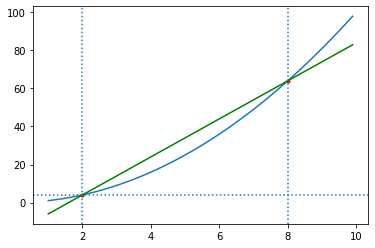

In [46]:
x = np.arange(1, 10, 0.1)
y = x**2
plt.plot(x, y)
x1 = 2
x2 = 8
plt.plot(x1, x1**2, '.', color='r') # x1
plt.plot(x2, x2**2, '.', color='r') # x2
dx = x2 - x1
dy = x2**2  - x1**2
k = dy/dx
b = - (k*x1 - x1**2)
y1 = k*x + b
plt.plot(x,y1,'g')
plt.axvline(x=x1, ls=':')
plt.axvline(x=x2, ls=":")
plt.axhline(y=x1**2, ls=":");

Если сейчас приближать $x_2$ к $x_1$ до бесконечно близкой величины то мы при сохранении отношения и смысла получим уже не приращение функции y=f(x) за промежуток $x_2 - x_1$, а получим наклон (то есть степень приращения) функции в точке и секущая станет касательной.

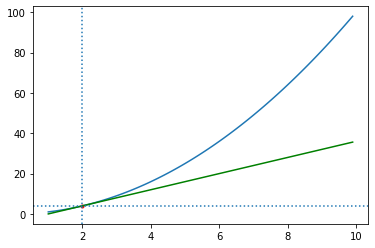

In [50]:
x = np.arange(1, 10, 0.1)
y = x**2
plt.plot(x, y)
x1 = 2
plt.plot(x1, x1**2, '.', color='r') # x1
k = 2*x1  # угол наклона касательной в точке x1
b = - (k*x1 - x1**2)
y1 = k*x + b
plt.plot(x,y1,'g')
plt.axvline(x=x1, ls=':')
plt.axhline(y=x1**2, ls=":");

Если мы проделаем такую процедуру для каждой точки x и построим такой график - как тангенс угла наклона касательной меняется от x, то мы получим производную исходной функции $f^\prime(x)$

Например для функции параболы $y = a \cdot x^2 + b \cdot x + c$ график производной равен $y^\prime(x) = 2 \cdot a \cdot x + b$ то есть как мы знаем это прямая линия у которой тангенс угла наклона 2a и смещением b. Вторая производная равна $y^{\prime\prime} = 2 \cdot a$. 

Еще раз угол наклона касательной квадратичной функции меняется по линейному закону - чем больше x  тем больше угол

### Задача поиска минимума или максимума функции

Когда производная функции обращается в нуль? Когда нулю равен тангес угла наклона касательной. То есть угол 0. То есть это горизонтальная прямая. То есть исходная функция в этой точке имеет точку перегиба. И это либо максимум исходной функции либо минимум. 

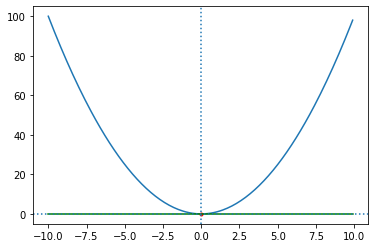

In [52]:
x = np.arange(-10, 10, 0.1)
y = x**2
plt.plot(x, y)
x1 = 0
plt.plot(x1, x1**2, '.', color='r') # x1
k = 2*x1  # угол наклона касательной в точке x1
b = - (k*x1 - x1**2)
y1 = k*x + b
plt.plot(x,y1,'g')
plt.axvline(x=x1, ls=':')
plt.axhline(y=x1**2, ls=":");

Таким образом стандартный способ решать задачу минимизации какой-то функции y = f(x) это
1. взять ее производную
2. приравнять ее к нулю $f^\prime(x) = 0$
3. решить уравнение найдя x при котором производная обращается в ноль
4. проверить, минимум это или максимум исходной функции

### Минимизация ошибки линейной регрессии

Теперь если вернуться к задаче линейной регрессии мы остановились на том что у нас есть множество ошибок нам надо их минимизировать в совокупности. 

Если сейчас использовать квадратную функцию для оценки среднего множества ошибок то можно записать средне-квадратическую ошибку:

$err = \frac{1}{n}\sum_{i=1}^{i=n} z_i^2$

или если вспомнить что такое z

$err = \frac{1}{n}\sum_{i=1}^{i=n} (y_i - y\_pred_i)^2$

раскрываем дальше и получаем некоторую функциональную зависимость ошибки от параметров k и b:

$f(k,b) = \frac{1}{n}\sum_{i=1}^{i=n} (y_i - k \cdot x_i + b)^2$

или

$f(k,b) = \frac{1}{n}((y_1 - k \cdot x_1 + b)^2 + (y_2 - k \cdot x_2 + b)^2 + \cdots + (y_n - k \cdot x_n + b)^2)$

учитывая что 
$(y_i - k \cdot x_i + b)^2 = y_i^2 + k^2 \cdot x_i^2 + b^2 - 2 \cdot y_i \cdot k \cdot x_i + 2 \cdot y_i \cdot b - 2 \cdot k \cdot x_i \cdot b$

расскрывая квадраты:

$f(k,b) = \frac{1}{n}(y_1^2 + k^2 \cdot x_1^2 + b^2 - 2 \cdot y_1 \cdot k \cdot x_1 + 2 \cdot y_1 \cdot b - 2 \cdot k \cdot x_1 \cdot b + y_2^2 + k^2 \cdot x_2^2 + b^2 - 2 \cdot y_2 \cdot k \cdot x_2 + 2 \cdot y_2 \cdot b - 2 \cdot k \cdot x_2 \cdot b + \cdots + y_n^2 + k^2 \cdot x_n^2 + b^2 - 2 \cdot y_n \cdot k \cdot x_n + 2 \cdot y_n \cdot b - 2 \cdot k \cdot x_n \cdot b)$

далее мы помним что $y_i, y_i^2, x_i, x_i^2$ это константы данные нам из данных.

следовательно можно собрать все константы перед переменными:
$f(k, b) = \frac{\sum_{i=1}^{i=n} x_i^2}{n} \cdot k^2 + b^2 - 2 \frac{\sum_{i=1}^{i=n} x_i}{n} \cdot k \cdot b - 2 \frac{\sum_{i=1}^{i=n} x_i\cdot y_i}{n} \cdot k + 2 \frac{\sum_{i=1}^{i=n} y_i}{n} \cdot b + \frac{\sum_{i=1}^{i=n} y_i^2}{n}$

введем обозначения для констант

$mean\_x = \frac{\sum_{i=1}^{i=n} x_i}{n} = A$  
$mean\_y = \frac{\sum_{i=1}^{i=n} y_i}{n} = B$  
$mean\_xy = \frac{\sum_{i=1}^{i=n} x_i \cdot y_i}{n} = C$  
$mean\_xs = \frac{\sum_{i=1}^{i=n} x_i^2}{n} = D$  
$mean\_ys = \frac{\sum_{i=1}^{i=n} y_i^2}{n} = E$  

тогда

$f(k, b) = mean\_xs \cdot k^2  + b^2 - 2mean\_x \cdot kb - 2 mean\_xy \cdot k + 2mean\_y \cdot b + mean\_ys$

или

$f(k, b) = D \cdot k^2  + b^2 - 2A \cdot kb - 2C \cdot k + 2B \cdot b + E$

Как видим функция f(k, b) это функция двух переменныx

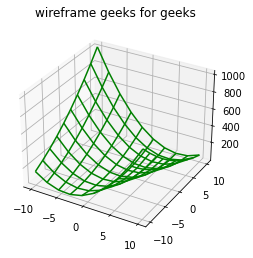

In [63]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# function for z axis
def f(k, b):
    A,B,C,D,E = 2,2,4,4,4  # взяты для примера
    return D*k**2 + b**2 - 2*A*k*b - 2*C*k + 2*B*b + E
 
# x and y axis
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
  
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
 
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, Z, color ='green')
ax.set_title('wireframe geeks for geeks');

Для функции двух и более переменных у нас правила немного меняются. Во-первых появляется понятие частных производных. Это когда мы фукнцию нескольких переменных считаем функцией одной переменной а остальные переменные считаем за параметры. В случае функции нескольких переменных нам надо найти частные производные по каждой переменной приравнять их к нулю и это даст только возможные точки максимума минимума функции. 

Частные производные обознаются чаще не с помощью штрика (так как не понятно по какой переменной идет дифференцирование, а спомощью записи $\frac{\partial f(x,y)}{\partial x}$ - здесь сказано продиференцировать функцию f по переменной x

Таким образом используя правило дифференцирования квадратной функции  
$(x^2)^\prime = 2x$  
правило диференцирования линейной функции  
$(4x)^\prime = 4$  
и правило дифференцированяи константы  
$(4)^\prime = 0$  

мы можем взять частные производные от нашей ошибки. когда берем производную по одной переменная вторая считается константой:

$f(k, b) = D \cdot k^2  + b^2 - 2A \cdot kb - 2C \cdot k + 2B \cdot b + E$

$\frac{\partial f(k, b)}{\partial k} = 2Dk   - 2Ab - 2C$  
$\frac{\partial f(k, b)}{\partial b} = 2b - 2Ak + 2B$

Таким образом получаем систему уравнений:

$$
\begin{cases} 
2Dk - 2Ab - 2C = 0\\
2b - 2Ak + 2B = 0
\end{cases}
$$

и решаем ее

$$
\begin{cases} 
2Dk - 2Ab - 2C = 0\\
b = Ak - B
\end{cases}
$$

$$
\begin{cases} 
2Dk - 2A^2k + 2AB - 2C = 0\\
b = Ak - B
\end{cases}
$$

$$
\begin{cases} 
k = \frac{2C - 2AB}{2D - 2A^2}\\
b = Ak - B
\end{cases}
$$

$$
\begin{cases} 
k = \frac{2C - 2AB}{2D - 2A^2}\\
b = A\frac{2C - 2AB}{2D - 2A^2} - B
\end{cases}
$$

Таким образом благодаря тому что функция ошибки получилась такая что у нее только одна точка минимума, нет перегибов мы можем сказать что получившееся решение и есть наши параметры для уравнения регрессии

Попробуйте самостоятельно подобрать коэффициенты k и b для какого-нибудь числового свойства из датасета и целевой переменной

Возможно в выборе свойства поможет оценка линейности зависимости y от x

In [67]:
col_num = list([col for col in data_train.columns if data_train[col].dtype != "object" and\
                not col in ["Id", "SalePrice"]])
col_num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

<ipython-input-69-1b0c454547d7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


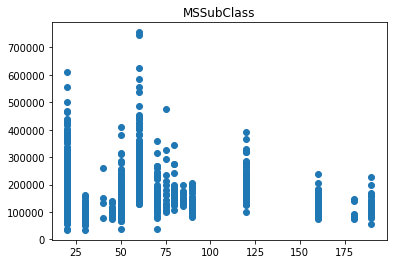

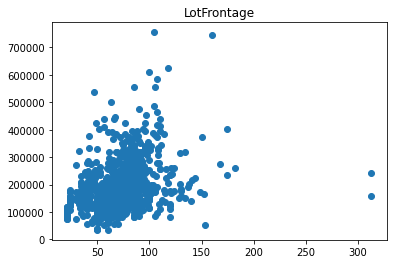

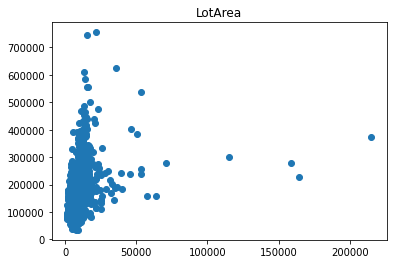

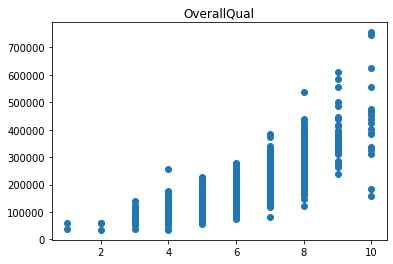

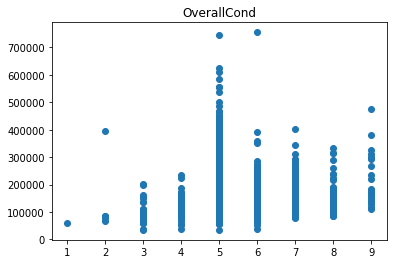

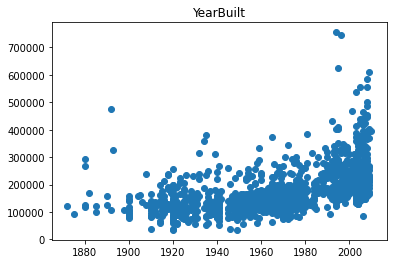

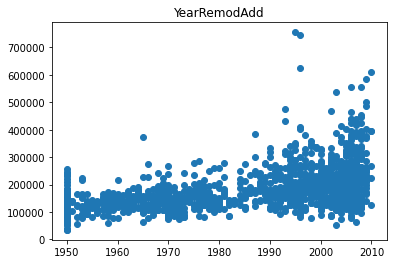

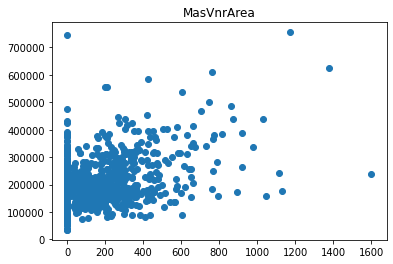

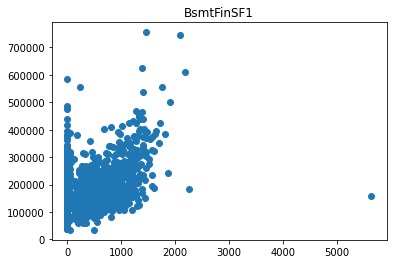

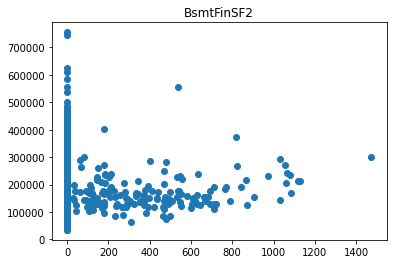

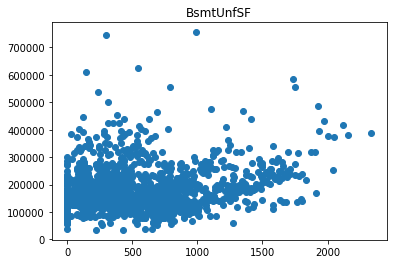

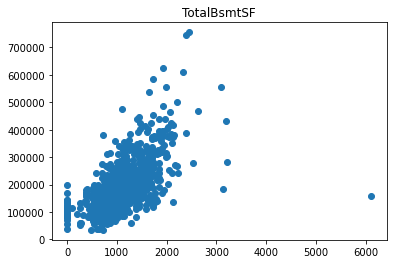

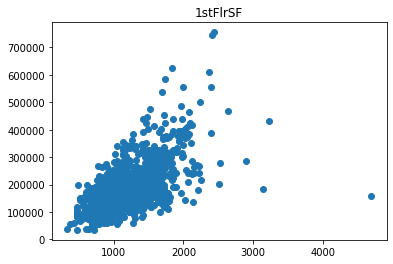

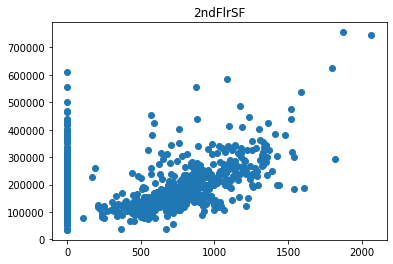

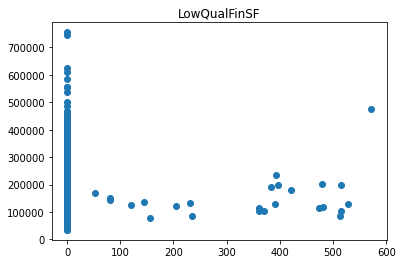

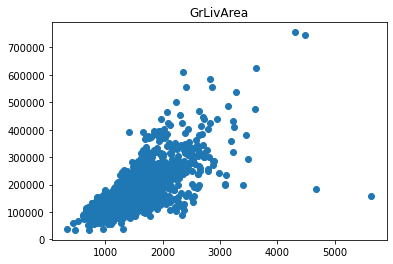

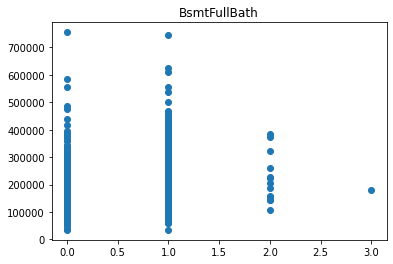

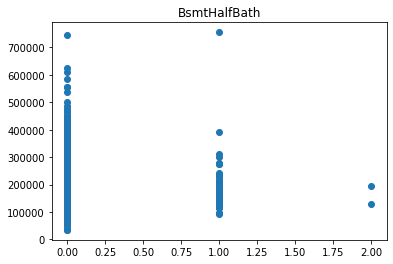

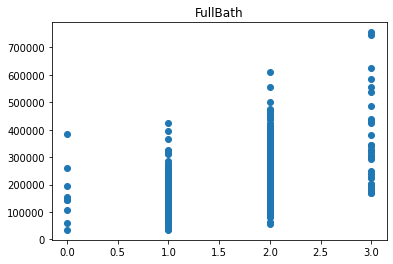

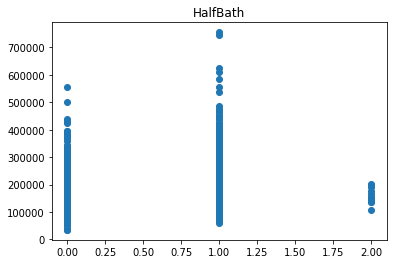

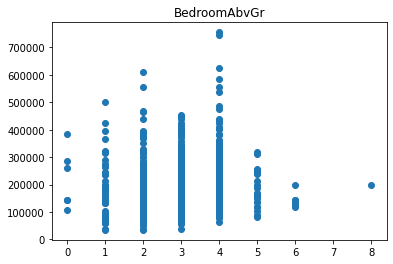

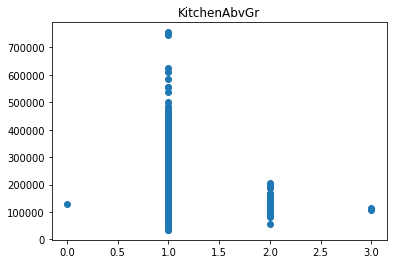

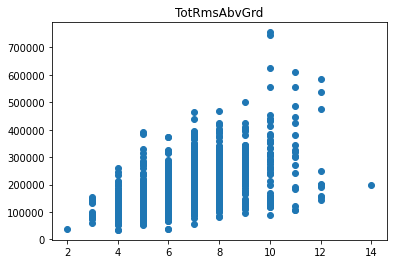

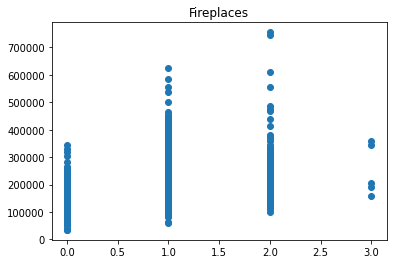

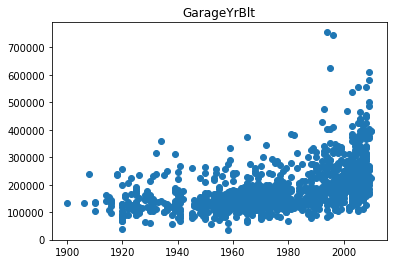

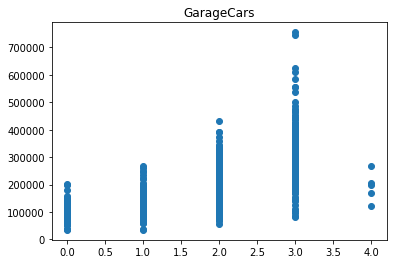

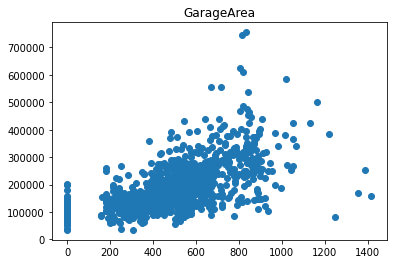

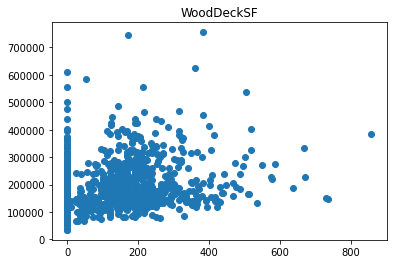

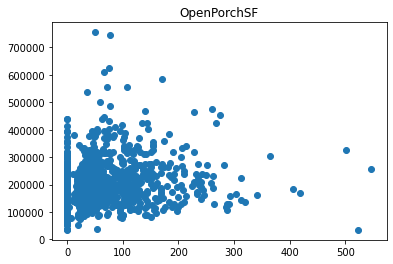

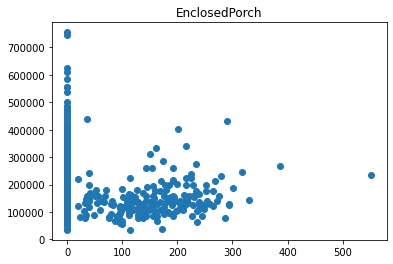

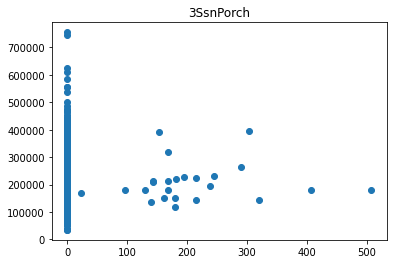

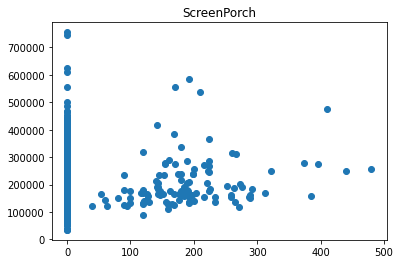

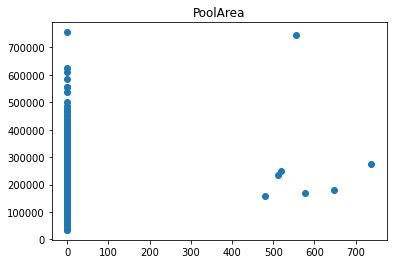

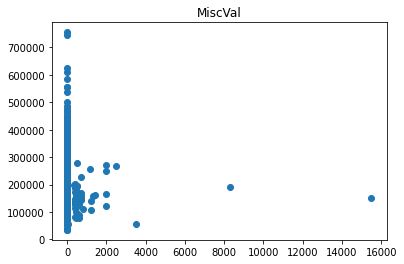

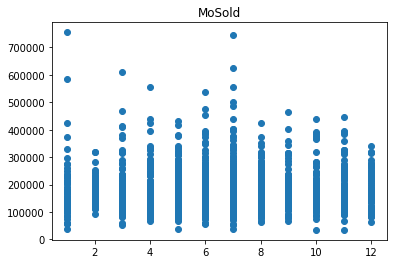

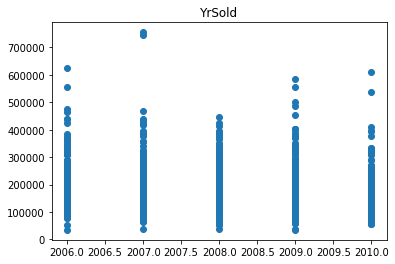

In [69]:
for col in col_num:
    plt.figure()
    plt.title(col)
    plt.scatter(data_train[col], data_train["SalePrice"])

$$
\begin{cases} 
k = \frac{2C - 2AB}{2D - 2A^2}\\
b = A\frac{2C - 2AB}{2D - 2A^2} - B
\end{cases}
$$

In [81]:
xi = data_train["OverallQual"]
yi = data_train["SalePrice"]
xyi = xi*yi
x2i = xi*xi
y2i = yi*yi

A,B,C,D,E = np.mean(xi),np.mean(yi),np.mean(xyi),np.mean(x2i),np.mean(y2i)
k = (2*C - 2*A*B)/(2*D - 2*A**2)
b = A*k - B

In [82]:
b,k

(96206.0795147605, 45435.80259309942)

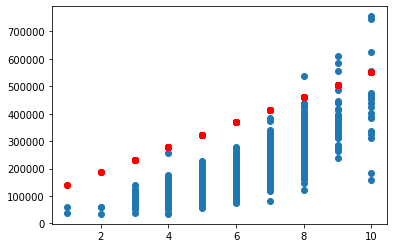

In [84]:
plt.scatter(xi, yi)
plt.scatter(xi, k*xi + b, color="r")